In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e12/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e12/sample_submission.csv')
df_sub

,id,diagnosed_diabetes
0,700000,0
1,700001,0
2,700002,0
3,700003,0
4,700004,0
...,...,...
299995,999995,0
299996,999996,0
299997,999997,0
299998,999998,0


In [3]:
y = df_train['diagnosed_diabetes']
x = df_train.drop('diagnosed_diabetes', axis=1)

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [5]:
x_dummies = pd.get_dummies(x)

In [6]:
x_dummies.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,True,False,False,True,False,False,True,False,False,False
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,False,False,True,False,False,True,True,False,False,False
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,True,False,False,False,False,True,False,True,False,False
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,True,False,False,True,False,False,True,False,False,False
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,False,False,True,False,False,True,False,True,False,False


In [7]:
df_train_d = pd.get_dummies(df_train)

In [8]:
column_titles = [col for col in df_train_d if col!='diagnosed_diabetes'] + ['diagnosed_diabetes']

df_train_d = df_train_d.reindex(columns = column_titles)

In [9]:
df_train_d.corr()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,income_level_Middle,income_level_Upper-Middle,smoking_status_Current,smoking_status_Former,smoking_status_Never,employment_status_Employed,employment_status_Retired,employment_status_Student,employment_status_Unemployed,diagnosed_diabetes
id,1.000000,0.001615,0.001614,0.012424,0.000878,-0.002118,-0.000716,-0.000692,-0.000144,0.001546,...,-0.000337,-0.000466,0.000097,0.001078,-0.000912,-0.000186,0.000385,-0.000184,-0.000125,-0.000075
age,0.001615,1.000000,0.003295,-0.029101,-0.001898,-0.001286,-0.002313,0.062958,0.044654,0.502894,...,0.000178,-0.004668,0.002778,0.001404,-0.003252,0.002964,-0.002097,0.000568,-0.002396,0.161162
alcohol_consumption_per_week,0.001614,0.003295,1.000000,0.003010,0.003284,-0.000351,0.004797,-0.017552,-0.014716,-0.006472,...,0.004919,-0.003096,0.002664,0.009856,-0.009716,-0.001423,-0.001646,0.002889,0.003022,0.002991
physical_activity_minutes_per_week,0.012424,-0.029101,0.003010,1.000000,0.008466,-0.006900,0.001754,-0.085086,-0.067508,-0.030908,...,-0.003984,0.005711,-0.000046,-0.003593,0.002822,-0.002781,-0.000309,0.002961,0.003370,-0.169789
diet_score,0.000878,-0.001898,0.003284,0.008466,1.000000,0.000882,0.000382,-0.198899,-0.150906,-0.038676,...,0.002569,-0.001979,0.009965,0.002791,-0.009926,0.002212,-0.003056,0.002467,-0.000902,-0.050119
sleep_hours_per_day,-0.002118,-0.001286,-0.000351,-0.006900,0.000882,1.000000,0.005965,0.003380,0.000371,0.003995,...,0.003569,-0.004584,0.001731,-0.004486,0.002130,-0.003341,0.001440,-0.000536,0.003971,0.003509
screen_time_hours_per_day,-0.000716,-0.002313,0.004797,0.001754,0.000382,0.005965,1.000000,0.002758,0.003393,0.004276,...,-0.004534,0.003980,0.002812,-0.003354,0.000410,-0.005081,0.004845,0.001769,0.000599,0.018213
bmi,-0.000692,0.062958,-0.017552,-0.085086,-0.198899,0.003380,0.002758,1.000000,0.757191,0.225033,...,-0.005057,-0.001422,-0.009977,0.003067,0.005394,0.000850,0.001328,-0.002841,-0.001610,0.105580
waist_to_hip_ratio,-0.000144,0.044654,-0.014716,-0.067508,-0.150906,0.000371,0.003393,0.757191,1.000000,0.171691,...,-0.006503,-0.000744,-0.006851,0.001585,0.004108,0.002048,0.001401,-0.002719,-0.003844,0.081050
systolic_bp,0.001546,0.502894,-0.006472,-0.030908,-0.038676,0.003995,0.004276,0.225033,0.171691,1.000000,...,-0.003920,-0.002196,-0.001350,-0.002230,0.002780,0.000680,-0.000490,-0.001334,0.000372,0.107132


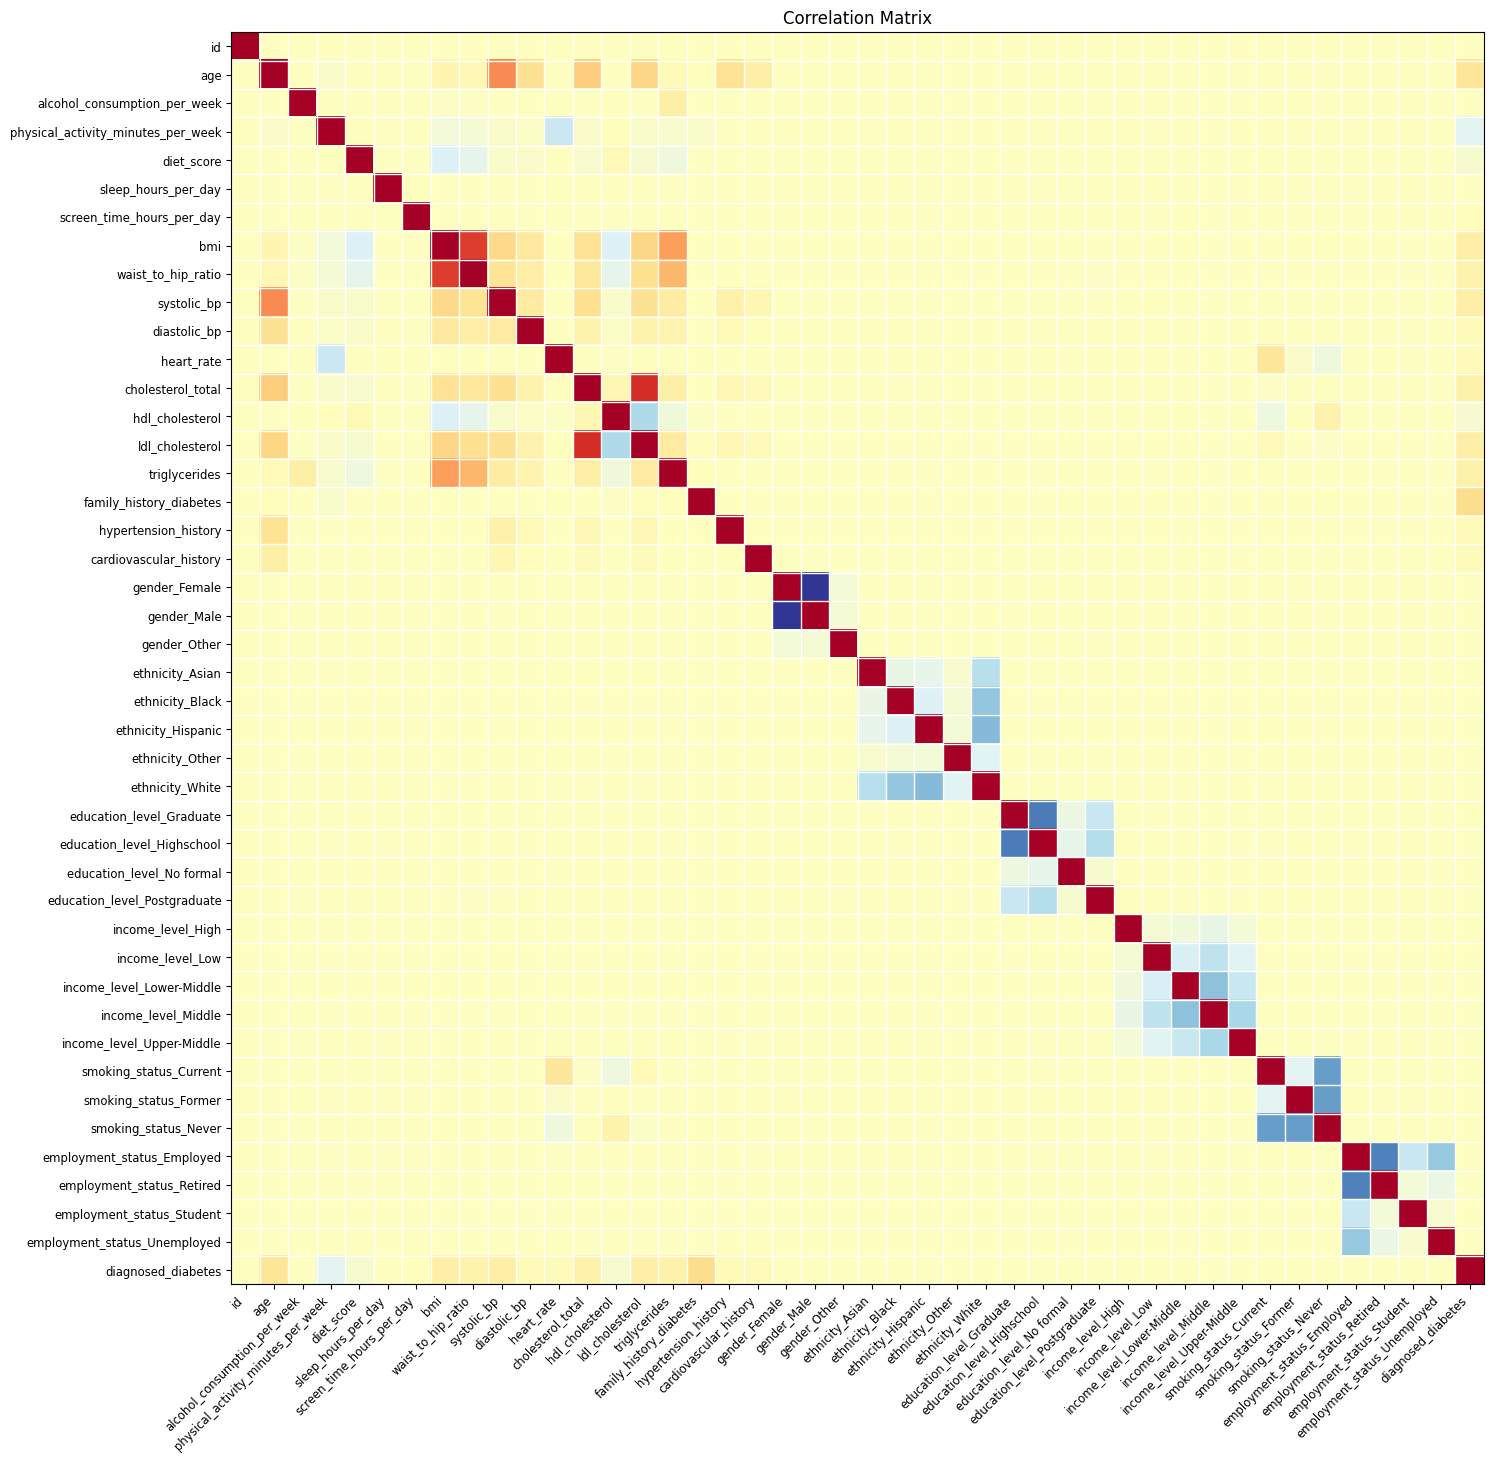

In [10]:
# The correlation heatmap
import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train_d.corr(), xnames = df_train_d.corr().columns, ax = ax);

From our observation, it is important to remove some variables which avoids the effect of working with supoerflous or redundant information. Some independent variables are correlated which would bring collinearity issues

In [11]:
from statsmodels.formula.api import ols
dfm = df_train_d.copy()

y_name = 'diagnosed_diabetes'

dfm.columns = [col.replace(" ","_") for col in dfm.columns]
dfm.columns = [col.replace("-","_") for col in dfm.columns]

#x_dummies.columns = [col.replace(" ","_") for col in x_dummies.columns]



X_names = [col for col in dfm.columns if col !=y_name]

formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))


Formula:
	 diagnosed_diabetes ~ id + age + alcohol_consumption_per_week + physical_activity_minutes_per_week + diet_score + sleep_hours_per_day + screen_time_hours_per_day + bmi + waist_to_hip_ratio + systolic_bp + diastolic_bp + heart_rate + cholesterol_total + hdl_cholesterol + ldl_cholesterol + triglycerides + family_history_diabetes + hypertension_history + cardiovascular_history + gender_Female + gender_Male + gender_Other + ethnicity_Asian + ethnicity_Black + ethnicity_Hispanic + ethnicity_Other + ethnicity_White + education_level_Graduate + education_level_Highschool + education_level_No_formal + education_level_Postgraduate + income_level_High + income_level_Low + income_level_Lower_Middle + income_level_Middle + income_level_Upper_Middle + smoking_status_Current + smoking_status_Former + smoking_status_Never + employment_status_Employed + employment_status_Retired + employment_status_Student + employment_status_Unemployed


In [12]:
X_names

['id',
 'age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ethnicity_Asian',
 'ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Other',
 'ethnicity_White',
 'education_level_Graduate',
 'education_level_Highschool',
 'education_level_No_formal',
 'education_level_Postgraduate',
 'income_level_High',
 'income_level_Low',
 'income_level_Lower_Middle',
 'income_level_Middle',
 'income_level_Upper_Middle',
 'smoking_status_Current',
 'smoking_status_Former',
 'smoking_status_Never',
 'employment_status_Employed',
 'employment_status_Retired',
 'employment_status_Student',
 'employment_status_Unemployed']

In [13]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     diagnosed_diabetes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2262.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:04:56   Log-Likelihood:            -4.4656e+05
No. Observations:              700000   AIC:                         8.932e+05
Df Residuals:                  699962   BIC:                         8.936e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Problem with one hot dummy encoding is multicolinearity and we solve this by droppin one of the dummies created, to create n-1 column for each vairable with n categories

In [14]:

df_train_d1 = pd.get_dummies(df_train, drop_first = True)
df_train_d1 = df_train_d1.drop('id', axis=1)

# Again make sure that all the column names have underscores instead of whitespaces
df_train_d1.columns = [col.replace(" ", "_") for col in df_train_d1.columns]
df_train_d1.columns = [col.replace("-", "_") for col in df_train_d1.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_train_d1.columns if col !=
                 'diagnosed_diabetes'] + ['diagnosed_diabetes']
df_train_d1 = df_train_d1.reindex(columns=column_titles)

df_train_d1.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,income_level_Low,income_level_Lower_Middle,income_level_Middle,income_level_Upper_Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,False,True,False,False,False,False,False,False,False,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,False,False,False,True,False,True,False,False,False,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,False,True,False,False,False,True,True,False,False,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,False,True,False,False,False,False,False,False,False,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,False,False,False,True,False,True,True,False,False,1.0


In [15]:
df_train_d1.shape

(700000, 37)

In [16]:
df_train_d1.columns

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'gender_Male', 'gender_Other',
       'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Other',
       'ethnicity_White', 'education_level_Highschool',
       'education_level_No_formal', 'education_level_Postgraduate',
       'income_level_Low', 'income_level_Lower_Middle', 'income_level_Middle',
       'income_level_Upper_Middle', 'smoking_status_Former',
       'smoking_status_Never', 'employment_status_Retired',
       'employment_status_Student', 'employment_status_Unemployed',
       'diagnosed_diabetes'],
      dtype='object')

In [17]:
X_names = [col for col in df_train_d1.columns if col !=y_name]

formula_str = y_name+" ~ "+" + ".join(X_names);
#print('Formula:\n\t {}'.format(formula_str))

model = ols(formula=formula_str, data=df_train_d1)
fitted = model.fit()

print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:     diagnosed_diabetes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2325.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:05:00   Log-Likelihood:            -4.4656e+05
No. Observations:              700000   AIC:                         8.932e+05
Df Residuals:                  699963   BIC:                         8.936e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


x.describe()

We create a new df to store the correlation coefficients as well as the p-values for reference

In [18]:
# Calculate correlations between predictor variables and the response variable
corrs = df_train_d1.corr()[y_name].sort_values(ascending=False)

In [19]:
corrs

diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
income_level_Low                      0.005424
income_level_Lower_Middle             0.004275
ethnicity_Other                       0.004170
education_level_No_formal             0.003892
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
gender_Other                          0.002590
gender_Male  

Using a **Pearson Regression** from SciPy
Here we are checking the correlation of the coefficients

In [20]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= y_name]

for col in column_titles:
    p_val = round(pearsonr(df_train_d1[col], df_train_d1[y_name])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
family_history_diabetes,0.211064,0.000000
diet_score,-0.050119,0.000000
ethnicity_Hispanic,-0.006880,0.000000
hdl_cholesterol,-0.053231,0.000000
screen_time_hours_per_day,0.018213,0.000000
heart_rate,0.023865,0.000000
cardiovascular_history,0.024746,0.000000
hypertension_history,0.029979,0.000000
physical_activity_minutes_per_week,-0.169789,0.000000
waist_to_hip_ratio,0.081050,0.000000


##### We take the statistically significant features at p<.05

In [21]:
# The dependent variable remains the same:
y_data = df_train_d1[y_name]  # y_name = 'diagnosed_diabetes'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_train_d1[X_names]


In [22]:
X_data

,family_history_diabetes,age,systolic_bp,bmi,ldl_cholesterol,triglycerides,cholesterol_total,waist_to_hip_ratio,diastolic_bp,hypertension_history,...,gender_Other,income_level_Upper_Middle,education_level_Highschool,employment_status_Retired,education_level_Postgraduate,income_level_Middle,ethnicity_Hispanic,diet_score,hdl_cholesterol,physical_activity_minutes_per_week
0,0,31,112,33.4,114,102,199,0.93,70,0,...,False,False,True,False,False,False,True,7.7,58,45
1,0,50,120,23.8,121,124,199,0.83,77,0,...,False,True,True,False,False,False,False,5.7,50,73
2,0,32,95,24.1,114,108,188,0.83,89,0,...,False,False,True,True,False,False,True,8.5,59,158
3,0,54,121,26.6,85,123,182,0.83,69,1,...,False,False,True,False,False,False,False,4.6,54,77
4,0,54,108,28.8,131,124,206,0.90,60,1,...,False,True,True,True,False,False,False,5.7,49,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,0,29,133,26.1,90,126,163,0.88,57,0,...,False,True,False,False,True,False,True,6.9,58,59
699996,0,46,106,25.5,107,119,188,0.85,85,0,...,False,True,False,False,False,False,True,7.7,45,72
699997,0,35,127,26.9,77,166,168,0.88,84,0,...,False,False,False,False,False,True,False,5.6,59,50
699998,0,49,116,25.2,108,133,198,0.86,67,0,...,False,False,True,True,False,False,False,5.7,55,70


_We could in actual fact tweak the correlation threshold and see if our model performs better_

In [23]:
X_data.corr()

,family_history_diabetes,age,systolic_bp,bmi,ldl_cholesterol,triglycerides,cholesterol_total,waist_to_hip_ratio,diastolic_bp,hypertension_history,...,gender_Other,income_level_Upper_Middle,education_level_Highschool,employment_status_Retired,education_level_Postgraduate,income_level_Middle,ethnicity_Hispanic,diet_score,hdl_cholesterol,physical_activity_minutes_per_week
family_history_diabetes,1.000000,0.018417,0.009284,0.006417,0.014129,0.014825,0.010208,0.004509,0.003912,0.008302,...,0.002079,0.001692,-0.005617,0.003452,0.000775,-0.004486,-0.007201,-0.005173,-0.010868,-0.035260
age,0.018417,1.000000,0.502894,0.062958,0.245503,0.043605,0.283155,0.044654,0.188403,0.177636,...,-0.000327,-0.004668,-0.001047,-0.002097,0.002204,0.000178,-0.000995,-0.001898,0.002654,-0.029101
systolic_bp,0.009284,0.502894,1.000000,0.225033,0.187003,0.125682,0.196124,0.171691,0.132916,0.093637,...,0.000327,-0.002196,0.002945,-0.000490,-0.009938,-0.003920,-0.004455,-0.038676,-0.039579,-0.030908
bmi,0.006417,0.062958,0.225033,1.000000,0.241057,0.443837,0.180075,0.757191,0.143702,0.009471,...,-0.002460,-0.001422,-0.001652,0.001328,-0.009610,-0.005057,0.000564,-0.198899,-0.197702,-0.085086
ldl_cholesterol,0.014129,0.245503,0.187003,0.241057,1.000000,0.131343,0.805909,0.193638,0.075297,0.045771,...,-0.002444,-0.001829,-0.001183,0.003324,0.002939,-0.003942,0.004251,-0.055908,-0.375791,-0.033272
triglycerides,0.014825,0.043605,0.125682,0.443837,0.131343,1.000000,0.100834,0.359802,0.069475,0.007943,...,-0.001378,0.005572,-0.004252,-0.003170,-0.000648,-0.009900,-0.002857,-0.101834,-0.095271,-0.045595
cholesterol_total,0.010208,0.283155,0.196124,0.180075,0.805909,0.100834,1.000000,0.146030,0.075185,0.051344,...,-0.002233,0.000819,-0.000232,-0.000240,0.002530,-0.006483,0.004625,-0.041622,0.055017,-0.027439
waist_to_hip_ratio,0.004509,0.044654,0.171691,0.757191,0.193638,0.359802,0.146030,1.000000,0.111056,0.006384,...,-0.000661,-0.000744,0.002552,0.001401,-0.011122,-0.006503,0.001721,-0.150906,-0.154951,-0.067508
diastolic_bp,0.003912,0.188403,0.132916,0.143702,0.075297,0.069475,0.075185,0.111056,1.000000,0.036673,...,-0.001085,0.000480,-0.004364,-0.000892,0.004063,-0.000461,0.000269,-0.028384,-0.025440,-0.018341
hypertension_history,0.008302,0.177636,0.093637,0.009471,0.045771,0.007943,0.051344,0.006384,0.036673,1.000000,...,-0.001094,-0.004052,0.001178,-0.004122,-0.001085,0.001958,0.000259,0.001112,-0.000447,-0.005766


In [24]:
corr = X_data.corr()

corr[np.abs(corr) > 0.8]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,family_history_diabetes,age,systolic_bp,bmi,ldl_cholesterol,triglycerides,cholesterol_total,waist_to_hip_ratio,diastolic_bp,hypertension_history,...,gender_Other,income_level_Upper_Middle,education_level_Highschool,employment_status_Retired,education_level_Postgraduate,income_level_Middle,ethnicity_Hispanic,diet_score,hdl_cholesterol,physical_activity_minutes_per_week
family_history_diabetes,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
systolic_bp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ldl_cholesterol,NaN,NaN,NaN,NaN,1.000000,NaN,0.805909,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
triglycerides,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol_total,NaN,NaN,NaN,NaN,0.805909,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waist_to_hip_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diastolic_bp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hypertension_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.4)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,systolic_bp,age,triglycerides,waist_to_hip_ratio,cholesterol_total,bmi,ldl_cholesterol,bmi,income_level_Middle,income_level_Lower_Middle
age,0.502894,1.000000,0.043605,0.044654,0.283155,0.062958,0.245503,0.062958,0.000178,0.000413
systolic_bp,1.000000,0.502894,0.125682,0.171691,0.196124,0.225033,0.187003,0.225033,-0.003920,0.001361
bmi,0.225033,0.062958,0.443837,0.757191,0.180075,1.000000,0.241057,1.000000,-0.005057,0.006610
bmi,0.225033,0.062958,0.443837,0.757191,0.180075,1.000000,0.241057,1.000000,-0.005057,0.006610
ldl_cholesterol,0.187003,0.245503,0.131343,0.193638,0.805909,0.241057,1.000000,0.241057,-0.003942,0.001190
triglycerides,0.125682,0.043605,1.000000,0.359802,0.100834,0.443837,0.131343,0.443837,-0.009900,0.009651
cholesterol_total,0.196124,0.283155,0.100834,0.146030,1.000000,0.180075,0.805909,0.180075,-0.006483,0.003794
waist_to_hip_ratio,0.171691,0.044654,0.359802,1.000000,0.146030,0.757191,0.193638,0.757191,-0.006503,0.009051
income_level_Lower_Middle,0.001361,0.000413,0.009651,0.009051,0.003794,0.006610,0.001190,0.006610,-0.492975,1.000000
income_level_Middle,-0.003920,0.000178,-0.009900,-0.006503,-0.006483,-0.005057,-0.003942,-0.005057,1.000000,-0.492975


In [26]:
formula_str = y_name+' ~ '+' + '.join(X_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	diagnosed_diabetes ~ family_history_diabetes + age + systolic_bp + bmi + ldl_cholesterol + triglycerides + cholesterol_total + waist_to_hip_ratio + diastolic_bp + hypertension_history + cardiovascular_history + heart_rate + screen_time_hours_per_day + income_level_Low + income_level_Lower_Middle + ethnicity_Other + education_level_No_formal + sleep_hours_per_day + alcohol_consumption_per_week + gender_Other + income_level_Upper_Middle + education_level_Highschool + employment_status_Retired + education_level_Postgraduate + income_level_Middle + ethnicity_Hispanic + diet_score + hdl_cholesterol + physical_activity_minutes_per_week


In [27]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=df_train_d1)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     diagnosed_diabetes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2886.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:05:12   Log-Likelihood:            -4.4657e+05
No. Observations:              700000   AIC:                         8.932e+05
Df Residuals:                  699970   BIC:                         8.935e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


We move on to variable selection by variance thresholds

In [28]:
dfm = df_train_d1.copy()

In [29]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df_train_d1.columns)
X_names.remove(y_name)
X_data = df_train_d1[X_names]
y_data = df_train_d1[y_name]

In [30]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

### Variance Threshold in Scikit Learn

To implement Variance Threshold in Scikit Learn we have to do the following:

- Import and create an instance of the `VarianceThreshold` class
- Use the `.fit()` method to select subset of features based on the threshold.

In [31]:
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.02) ## Another vvariable to tweak, Read on other parameters to tweak on sklearn's feature selection
# Use the object to apply the threshold on data
selector.fit(X_normalize)


VarianceThreshold(threshold=0.02)

In [32]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
24,education_level_Highschool,0.249930
18,gender_Male,0.249416
23,ethnicity_White,0.247333
29,income_level_Middle,0.242789
32,smoking_status_Never,0.207418
28,income_level_Lower_Middle,0.190024
21,ethnicity_Hispanic,0.151210
30,income_level_Upper_Middle,0.149272
16,hypertension_history,0.148870
33,employment_status_Retired,0.138000


In [33]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,age,diet_score,systolic_bp,family_history_diabetes,hypertension_history,cardiovascular_history,gender_Male,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,...,education_level_Postgraduate,income_level_Low,income_level_Lower_Middle,income_level_Middle,income_level_Upper_Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0.171429,0.775510,0.291667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.442857,0.571429,0.402778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.185714,0.857143,0.055556,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.500000,0.459184,0.416667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,0.571429,0.236111,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [34]:
X_new.shape

(700000, 23)

We could experiment with different thresholds and plot a graph of effect and change in terms of predictions

In [35]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)
#selector_4 = VarianceThreshold(threshold=0.15)


selector_1.fit(X_normalize)
selector_2.fit(X_normalize)
selector_3.fit(X_normalize)

# The below code Selects a subset of columns defined by the above thresholds
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]


In [36]:
selector_t = VarianceThreshold(threshold=0.00)
selector_t.fit(X_normalize)
X_t = X_normalize[X_normalize.columns[selector_t.get_support(indices=True)]]




In [37]:
X_data_n = X_data.drop(['cholesterol_total','waist_to_hip_ratio','systolic_bp','income_level_Middle'], axis=1)

### OLS fit summary

Here's what the resulting OLS fit summary for a threshold of 0.03 says:

We shall continue check more collinearity and see what to do with the data with later models ar a later stage
\n We'll also need to know which correlation scheme to use, whether Pearsons or Spearman's

In [38]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_data_n.columns)
print('Formula:\n\t{}'.format(formula_str))

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df_train_d1)
fitted = model.fit()

print(fitted.summary())

Formula:
	diagnosed_diabetes ~ age + alcohol_consumption_per_week + physical_activity_minutes_per_week + diet_score + sleep_hours_per_day + screen_time_hours_per_day + bmi + diastolic_bp + heart_rate + hdl_cholesterol + ldl_cholesterol + triglycerides + family_history_diabetes + hypertension_history + cardiovascular_history + gender_Male + gender_Other + ethnicity_Black + ethnicity_Hispanic + ethnicity_Other + ethnicity_White + education_level_Highschool + education_level_No_formal + education_level_Postgraduate + income_level_Low + income_level_Lower_Middle + income_level_Upper_Middle + smoking_status_Former + smoking_status_Never + employment_status_Retired + employment_status_Student + employment_status_Unemployed
                            OLS Regression Results                            
Dep. Variable:     diagnosed_diabetes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Square

We note that removing the lowest and least variance parameter drastically affects our R2 and therefore decide not to use variance thresholding in our framework

### Statistical EDA

In [39]:
from scipy.stats import pearsonr

In [40]:
#!pytest validate_data.py -v

In [41]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


## Training and Comparing Reduced Models

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Train-test split the original dataset
X_train, X_test, y_train, y_test = train_test_split(df_train_d1,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [44]:
X_data_names = X_data.columns
X_data_n_names = X_data_n.columns

In [45]:
X_data_train = X_train[X_data_names]
X_data_test = X_test[X_data_names]

In [46]:
X_data_n_train = X_train[X_data_n_names]
X_data_n_test = X_test[X_data_n_names]

In [47]:
lm = LinearRegression()
lm_data = LinearRegression()
lm_data_n = LinearRegression()

In [48]:
lm.fit(X_train, y_train);
lm_data.fit(X_data_train, y_train);
lm_data_n.fit(X_data_n_train, y_train);


In [49]:
print(lm.intercept_, lm.coef_[0])
print(lm_data.intercept_, lm_data.coef_[0])
print(lm_data_n.intercept_, lm_data_n.coef_[0])

-1.4432899320127035e-15 1.4577903794903592e-17
0.25365281666577916 0.005656475598581607
0.2801690490941679 0.005845839885723376


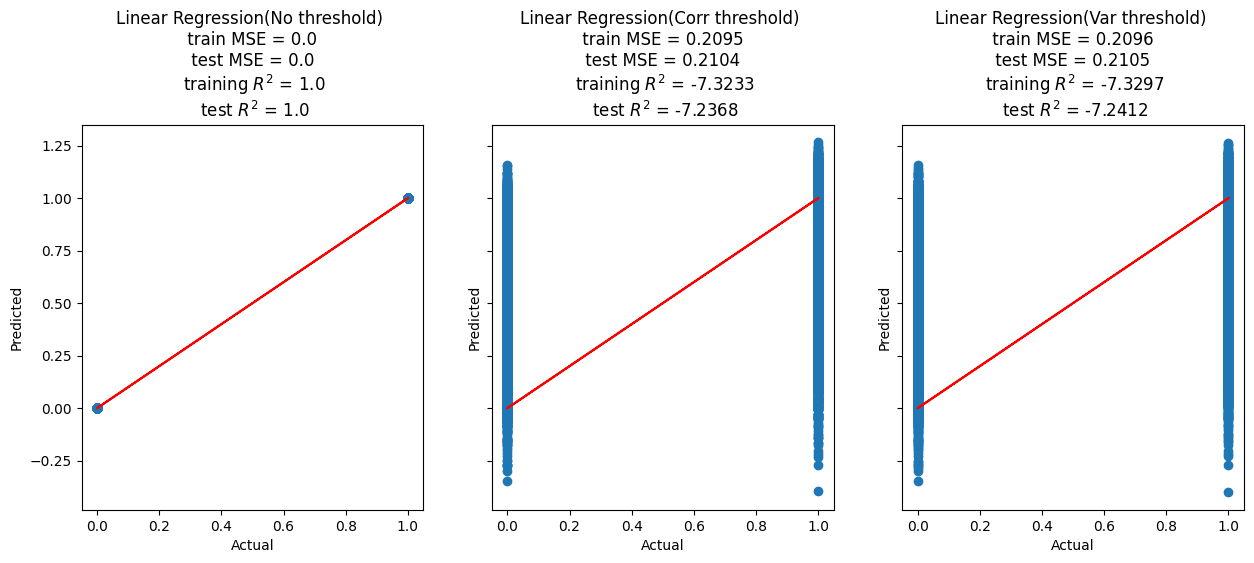

In [50]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_data.predict(X_data_train),
              lm_data_n.predict(X_data_n_train)]
test_pred = [lm.predict(X_test),
             lm_data.predict(X_data_test),
             lm_data_n.predict(X_data_n_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])